# Importing Libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from warnings import filterwarnings

from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, mean_squared_error, accuracy_score, f1_score, classification_report

# Loading Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('drive/MyDrive/hotel_bookings.csv')
# data = pd.read_csv('hotel_bookings.csv')

## **Part 1: Descriptive Analytics**

In [ ]:
pd.set_option('display.max_columns', None)
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
data.describe().T # Note: Only numerical features are included in this decription

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [ ]:
nb_examples = data.shape[0]
nb_features = data.shape[1]

print("Number of Examples:", nb_examples)
print("Number of Features:", nb_features)

Number of Examples: 119390
Number of Features: 32


Text(0.5, 1.0, 'Distribution of Cancelled Bookings')

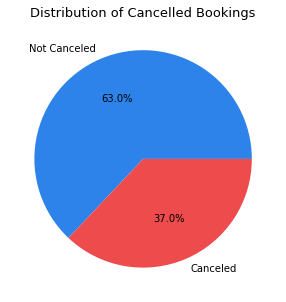

In [ ]:
labels_ = data.is_canceled.value_counts().index
labels__ = ["Canceled" if x == 1 else "Not Canceled" for x in labels_] 
sizes_ = data.is_canceled.value_counts()
plt.figure(figsize = (5,5))
plt.pie(sizes_, labels=labels__, autopct='%1.1f%%',colors = ['#2D83EA','#EE4C4C'])
plt.title('Distribution of Cancelled Bookings',color = 'black',fontsize = 13)

In [ ]:
print(round((data["is_canceled"].sum()/nb_examples)*100, 2), "% of the examples have a value of 1 for is_canceled")

37.04 % of the examples have a value of 1 for is_canceled


Text(0.5, 1.0, 'Correlation Heatmap')

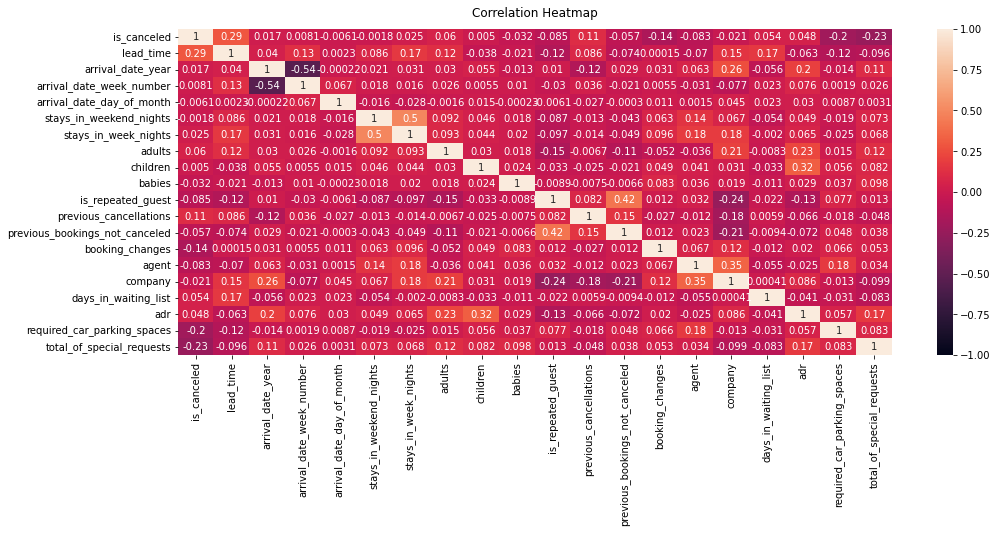

In [ ]:
# Finding the pairwise correlation of all columns in the dataframe

plt.figure(figsize=(16, 6))

# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [ ]:
# Sorting the correlation values to know which ones are interesting to look into
sorted_mat = data.corr().unstack().sort_values()

In [ ]:
# Displaying the 50 pairs of features with highest positive correlation
positive_corr = sorted_mat[350:].sort_values(ascending=False)

# Ignoring the first 20 values which are equal to 1 (elements of the diagaonal) 
positive_corr[20:] 

stays_in_weekend_nights         stays_in_week_nights              0.498969
stays_in_week_nights            stays_in_weekend_nights           0.498969
previous_bookings_not_canceled  is_repeated_guest                 0.418056
is_repeated_guest               previous_bookings_not_canceled    0.418056
agent                           company                           0.350746
company                         agent                             0.350746
adr                             children                          0.324854
children                        adr                               0.324854
is_canceled                     lead_time                         0.293123
lead_time                       is_canceled                       0.293123
company                         arrival_date_year                 0.259095
arrival_date_year               company                           0.259095
adr                             adults                            0.230641
adults                   

In [ ]:
# Displaying the 50 pairs of features with highest negative correlation
negative_corr = sorted_mat[:50].sort_values(ascending=True)
negative_corr

arrival_date_year               arrival_date_week_number         -0.540561
arrival_date_week_number        arrival_date_year                -0.540561
is_repeated_guest               company                          -0.244586
company                         is_repeated_guest                -0.244586
total_of_special_requests       is_canceled                      -0.234658
is_canceled                     total_of_special_requests        -0.234658
previous_bookings_not_canceled  company                          -0.208557
company                         previous_bookings_not_canceled   -0.208557
is_canceled                     required_car_parking_spaces      -0.195498
required_car_parking_spaces     is_canceled                      -0.195498
company                         previous_cancellations           -0.184574
previous_cancellations          company                          -0.184574
adults                          is_repeated_guest                -0.146426
is_repeated_guest        

Therefore, the pairs of features that would be interesting to study are:

- Previous Booking not cancelled vs. Is a repeated guest (41.8%)
- Average Daily Rate (adr) vs. Nb of Children per reservation (32.4%)
- Cancellations vs. Lead Time (29.3%)
- Average Daily Rate (adr) vs. Nb of Adults per reservation (23%)
- Average Daily Rate (adr) vs. Is a repeated guest (-24.4%)
- Reservation was made through a company vs. Is a repeated guest (-20.8%)

### What is the distribution per hotel type?

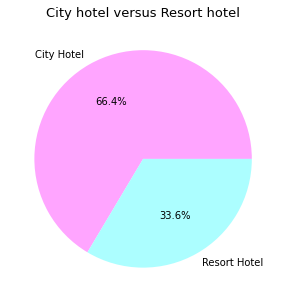

In [ ]:
labels = data.hotel.value_counts().index
sizes = data.hotel.value_counts()
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',colors = ['#FFA5FF','#ACFEFF'])
plt.title('City hotel versus Resort hotel',color = 'black',fontsize = 13);

### Which were the most busy months over all the years?

Text(0.5, 1.0, 'Number of Adults/Children per Month')

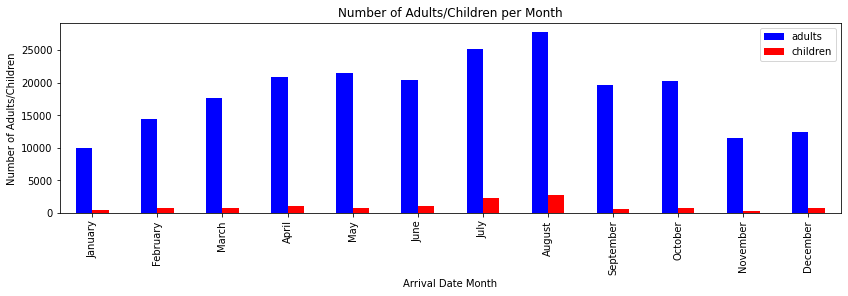

In [ ]:
field = "Month"
month_order = ["January","February","March","April","May","June","July","August","September","October","November","December"]
data.groupby(['arrival_date_month'])[['adults', 'children']].sum().loc[month_order].plot.bar(figsize = (14, 3.5),color=['blue', 'red'])
plt.ylabel('Number of Adults/Children')
plt.xlabel('Arrival Date Month')
plt.title('Number of Adults/Children per Month')

The bar chart above indicates an expected result which is that the busiest months of the year, where the most adults and children are observed, are during the summer, predominantely July and August.

### From where are the most guests coming ?

In [ ]:
labels = data.groupby(['country']).size().sort_values(ascending = False).index
values = data.groupby(['country']).size().sort_values(ascending = False)
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)]) 
fig.update_traces(textposition='inside')
fig.show()

From the pie chart above we conclude that the majority of the hotel visitors come from Portugal (PRT), the United Kingdom
(GBR), Spain (ESP), France (FRA), and Germany (DEU).

### During which months do we observe the most cancellations?

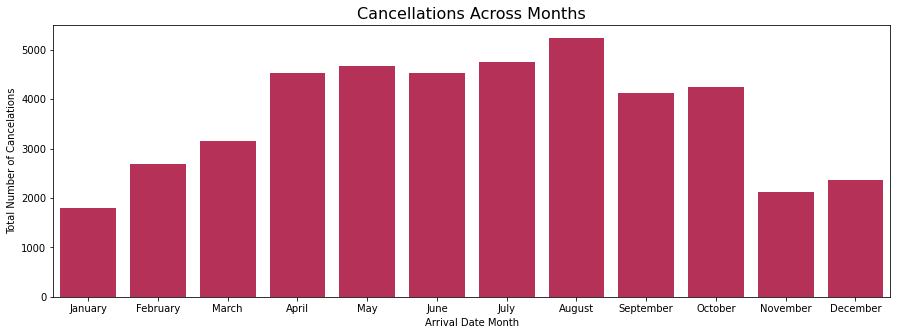

In [ ]:
plt.figure(figsize=(15,5))
data_to_plot = data.query('is_canceled==1')
sns.countplot(data=data_to_plot, x = 'arrival_date_month',hue='is_canceled',palette='rocket',order=["January","February","March","April","May","June","July","August","September","October","November","December"])
plt.legend('',frameon=False)
plt.title("Cancellations Across Months",fontsize=16)
plt.xlabel('Arrival Date Month')
plt.ylabel('Total Number of Cancelations')
plt.show()

The months April through August observe the most cancellations across all months, with August taking the lead. The latter fact is in line with the previous observed finding stating that August is the busiest month of the year. Taking a closer look at all months and comparing it with the inflow of customers during the respective months, it is noticeable that the cancellations are proportionate to the influx, which is reasonable.

### Is there a relationship with customers who have cancelled in the past with current cancellations?

In [ ]:
ngroup= data.groupby('is_canceled', as_index= False)[['previous_cancellations']].mean()
ngroup

,is_canceled,previous_cancellations
0,0,0.015792
1,1,0.208348


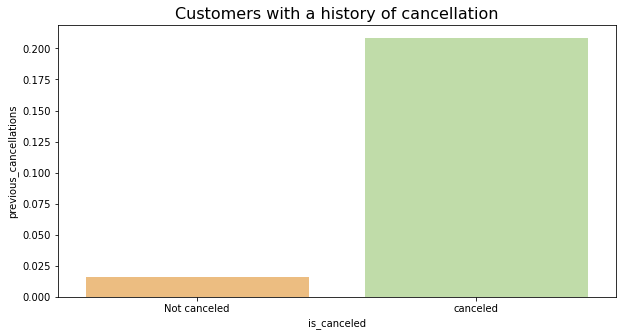

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Customers with a history of cancellation",fontsize=16)
history_of_cancellation=sns.barplot(data=ngroup, x=ngroup['is_canceled'], y=ngroup['previous_cancellations'], palette='Spectral')
history_of_cancellation.set_xticklabels(['Not canceled','canceled']);

The histogram above indicates that a client who has cancelled previous bookings is more likely to cancel again. 

### What is the effect of repeated guest on cancellations ?

In [ ]:
ngroup1= data.groupby('is_canceled', as_index= False)[['is_repeated_guest']].mean()
ngroup1

,is_canceled,is_repeated_guest
0,0,0.043344
1,1,0.012482


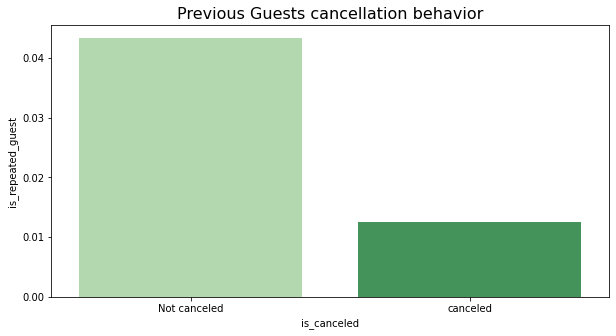

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Previous Guests cancellation behavior",fontsize=16)
history_of_cancellation=sns.barplot(data=ngroup1, x=ngroup1['is_canceled'], y=ngroup1['is_repeated_guest'], palette='Greens')
history_of_cancellation.set_xticklabels(['Not canceled','canceled']);

The histogram above illustrates that regular customers are less likely to cancel their booking than first-time 
clients. Which is logical, given that for a guest to come again it having already been to the hotel, he/she must be more certain of his/her choice.

### What is the relationship of lead time with cancellations ? 

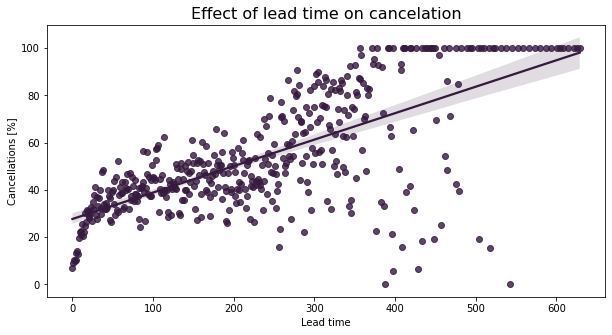

In [ ]:
leadtime_vs_canceled = data.groupby("lead_time")["is_canceled"].describe()

# Using only lead_times with more than 10 bookings
leadtime_vs_canceled_limit = leadtime_vs_canceled.loc[leadtime_vs_canceled["count"] >= 10]

plt.figure(figsize=(10,5))
sns.set_palette("rocket")
sns.regplot(x=leadtime_vs_canceled_limit.index, y=leadtime_vs_canceled_limit["mean"].values * 100)
plt.title("Effect of lead time on cancelation", fontsize=16)
plt.xlabel("Lead time",fontsize=10)
plt.ylabel("Cancellations [%]", fontsize=10)
plt.show()

From the above chart we conclude that the earlier a potential guest makes his/her reservation the more likely he/she is to cancel. Placing the booking way ahead of time can be tricky as life circumstances can get in the way which would lead in a change of plans and thus cancellations.

### Effect of Average Daily Rate on being a repeated guest

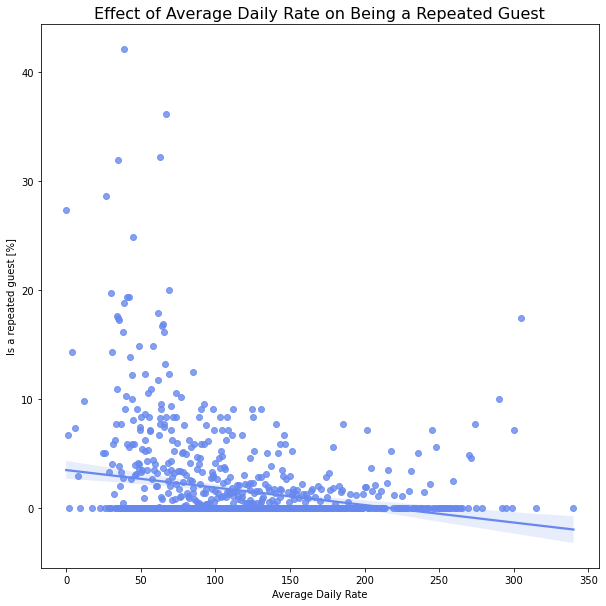

In [ ]:
adr_vs_repeated = data.groupby("adr")["is_repeated_guest"].describe()

adr_vs_repeated_limit = adr_vs_repeated.loc[adr_vs_repeated["count"] >= 10]

plt.figure(figsize=(10,10))
sns.set_palette("coolwarm")
sns.regplot(x=adr_vs_repeated_limit.index, y=adr_vs_repeated_limit["mean"].values * 100)
plt.title("Effect of Average Daily Rate on Being a Repeated Guest", fontsize=16)
plt.xlabel("Average Daily Rate",fontsize=10)
plt.ylabel("Is a repeated guest [%]", fontsize=10)
plt.show()

The above graph signals that new clients are more likely to spend more than guests that have already been to the hotel. Which is reasonable given that regulars would be less impressionable and know what they want, and probably not looking for a very high end experience. 

### How does the Average Daily Rate (ADR) vary across the months?

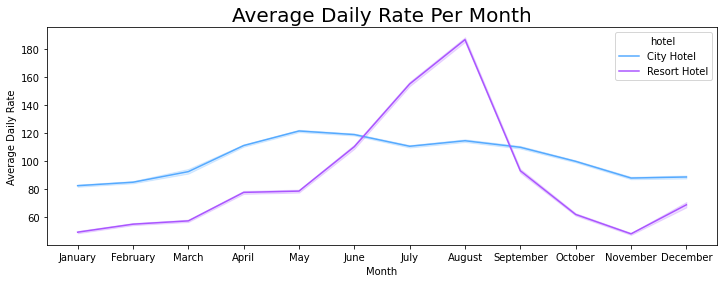

In [ ]:
adr_monthly = data[["hotel", "arrival_date_month", "adr"]].sort_values("arrival_date_month")
adr_monthly["arrival_date_month"] = pd.Categorical(adr_monthly["arrival_date_month"], categories=month_order, ordered=True)

plt.figure(figsize=(12,4))
sns.lineplot(data=adr_monthly , x='arrival_date_month', y='adr', hue='hotel', palette='cool')
plt.title('Average Daily Rate Per Month', fontdict={'fontsize' : 20})
plt.xlabel('Month')
plt.ylabel('Average Daily Rate')
plt.show()

The average daily rate varies over the months, with a sharp increase observed as the summer months are approaching, and a
sharp decrease once they are over, more specifically after the month of August. This is mainly observed for the Resort Hotel reservations. 

### What is the effect of the type of deposit on cancellations by segments ?

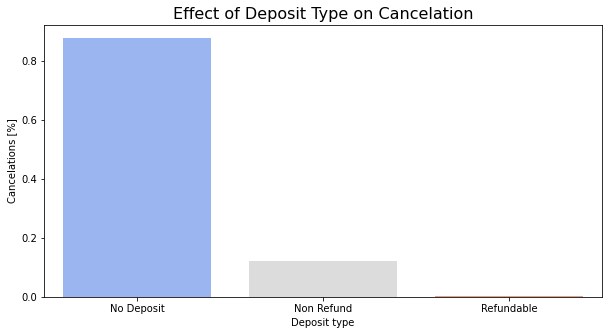

In [ ]:
deposit_cancel_data = data.groupby("deposit_type")["is_canceled"].describe()
total = sum(deposit_cancel_data["count"])

plt.figure(figsize=(10, 5))
sns.barplot(x= deposit_cancel_data.index, y= deposit_cancel_data["count"]/total ,palette='coolwarm')
plt.title("Effect of Deposit Type on Cancelation",fontsize=16)
plt.xlabel("Deposit type", fontsize=10)
plt.ylabel("Cancelations [%]",fontsize=10)
plt.show()

The bar chart above indicates that clients are more likely to cancel when they don't place a deposit for their
booking, which is realistically sound given that someone who has payed a refund would have invested resources in the booking and is thus less likely to cancel.

## **Part 2: Prediction of Booking Cancelations**

## Pre-processing 

In [ ]:
# Computing the number of null values in the columns that contain at least one null value

for i in range(nb_features):
    if data.iloc[:,i].isna().any():
        print("Feature", data.columns[i],"contains", data.iloc[:,i].isna().sum(), "null values, ie,", round((data.iloc[:,i].isna().sum()/nb_examples)*100,4), "% of the total.")

Feature children contains 4 null values, ie, 0.0034 % of the total.
Feature country contains 488 null values, ie, 0.4087 % of the total.
Feature agent contains 16340 null values, ie, 13.6862 % of the total.
Feature company contains 112593 null values, ie, 94.3069 % of the total.


In [ ]:
'''Dealing with null values'''

# Children Column: Filling null values with 0
data["children"] = data["children"].fillna(0)

# Company Column: Transforming it into a binary feature
newcol=[]

for i in range(nb_examples):
    if np.isnan(data["company"][i]):
        newcol.append(0)
    else:
        newcol.append(1)

data['company']=newcol

# Agent Column: Dropping the feature as 13.7% of it is null
data = data.drop(['agent'],axis=1)

# Country Column: Dropping the rows that contain a null value since they represent 0.4% of the total
data = data.dropna(axis = 0)

In [ ]:
# Transforming the values in reservation_status_date column from string to datetime type
data["reservation_status_date"] = pd.to_datetime(data["reservation_status_date"], format="%Y-%m-%d")

# Keeping only the reservation month out of the date
data['reservation_month'] = pd.DatetimeIndex(data["reservation_status_date"]).month
data = data.drop(["reservation_status_date"], axis=1)

In [ ]:
print(data.groupby("is_canceled")["reservation_status"].value_counts())

# Dropping the reservation_status column because given a new reservation for which we want to predict whether the customer will cancel it or not, the reservation status will not be known yet
data = data.drop(["reservation_status"], axis=1)

is_canceled  reservation_status
0            Check-Out             74745
1            Canceled              42954
             No-Show                1203
Name: reservation_status, dtype: int64


In [ ]:
# Finding categorical features
cat_columns = data.select_dtypes(include=['object']).columns.tolist()

for i in cat_columns:
    print(i,':',data[i].nunique())

hotel : 2
arrival_date_month : 12
meal : 5
country : 177
market_segment : 8
distribution_channel : 5
reserved_room_type : 10
assigned_room_type : 12
deposit_type : 3
customer_type : 4


In [ ]:
# Label Encoding all categorical features to be able to run the feature selection algorithm on all the features

db = data.copy()

encoder = LabelEncoder()

for i in cat_columns:
    db[i]=encoder.fit_transform(db[i])

In [ ]:
# Creating a function that standardizes the desired columns in the data

def standardize(data, cols):
    for column in cols:
        mean=np.mean(data[column])
        std=np.std(data[column])
        updated=(data[column]-mean)/std
        data[column]=updated
    return data

In [ ]:
# Defining the columns to standardize by excluding our binary features
cols = db.columns.difference(['hotel', 'is_canceled', 'is_repeated_guest', 'company'])
db = standardize(db, cols)

In [ ]:
# Separating the features values X and the output values y

X = db.loc[:, db.columns != 'is_canceled']
y = db['is_canceled']

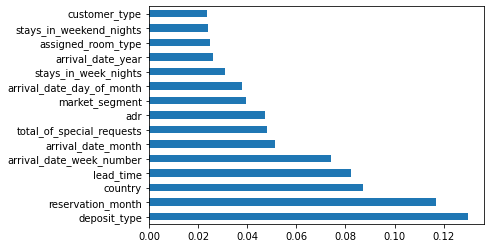

In [ ]:
# Feature Selection Method 1: Feature Importance based on Extra Trees Classifier

model = ExtraTreesClassifier()
model.fit(X,y)

# Plotting the graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
n= 15 # this value was tuned by us
feat_importances.nlargest(n).plot(kind='barh')
plt.show()

In [ ]:
# Feature Selection Method 2: Recursive Feature Elimination (RFE) with Logistic Regression Estimator

filterwarnings('ignore')

estimator = LogisticRegression(solver='lbfgs', max_iter=10000) 
rfe =RFE(estimator, n_features_to_select=15, step=1)
fit = rfe.fit(X, y)
print("Number of Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Number of Features: 15
Selected Features: [False  True False False  True False False False False False False False
  True  True  True  True  True  True  True  True False  True  True False
 False False  True  True  True]
Feature Ranking: [ 8  1  2 13  1 12 10  6  5  7 15 14  1  1  1  1  1  1  1  1  3  1  1  9
 11  4  1  1  1]


In [ ]:
# Printing the features that we will retain
print("Based on feature selection method 1, the features that we want to keep are:\n\n", feat_importances.nlargest(n).index.values, "\n" )

print("Based on feature selection method 2, the features that we want to keep are:\n\n", X.columns[np.where(fit.ranking_== 1)].to_numpy())

Based on feature selection method 1, the features that we want to keep are:

 ['reservation_month' 'deposit_type' 'country' 'lead_time'
 'arrival_date_week_number' 'arrival_date_month'
 'total_of_special_requests' 'adr' 'market_segment'
 'arrival_date_day_of_month' 'stays_in_week_nights' 'arrival_date_year'
 'assigned_room_type' 'customer_type' 'stays_in_weekend_nights'] 

Based on feature selection method 2, the features that we want to keep are:

 ['lead_time' 'arrival_date_week_number' 'country' 'market_segment'
 'distribution_channel' 'is_repeated_guest' 'previous_cancellations'
 'previous_bookings_not_canceled' 'reserved_room_type'
 'assigned_room_type' 'deposit_type' 'company'
 'required_car_parking_spaces' 'total_of_special_requests'
 'reservation_month']


In [ ]:
# Using feature selection method 1
top_features = data[(feat_importances.nlargest(n).index.values)]

# Using feature selection method 2
#top_features = data[X.columns[np.where(fit.ranking_== 1)]]

In [ ]:
 # Label encoding the country feature because it contains 177 unique values
top_features['country']=encoder.fit_transform(top_features['country'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Standardizing the non-categorical features
num_cols = top_features.select_dtypes(exclude=['object']).columns.tolist()
top_features = standardize(top_features, num_cols)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Creating a function that performs One-Hot Encoding 

def onehotencoding(data):
    cat_columns = data.select_dtypes(include=['object']).columns.tolist()
    for col in cat_columns:
        data[col] = data[col].astype('category').cat.codes
        newcol = pd.get_dummies(data[col], prefix=col)
        data = data.drop(columns= [col])
        data = data.join(newcol)
    return data 

In [ ]:
top_features = onehotencoding(top_features)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Training 

In [ ]:
# Split our dataset into train, validation and test sets
X = top_features
y = data['is_canceled']

# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8, stratify = y)

# Now since we want the validation and test size to be equal (10% each of overall data), we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_validate, X_test, y_validate, y_test = train_test_split(X_rem, y_rem, test_size=0.5, stratify = y_rem)

In [ ]:
# Logistic Regression Classifier 

parameters = [0.01, 0.1, 1, 10]
best_score = -1

for i in parameters:
    LogisticRegression_Classifier = LogisticRegression(C = i, max_iter=7000)
    LogisticRegression_Classifier.fit(X_train, y_train)
    y_predicted = LogisticRegression_Classifier.predict(X_validate)
    
    score = f1_score(y_validate, y_predicted, average='macro')
    accuracy = accuracy_score(y_validate, y_predicted)
    print('For hyperparameter =',i)
    print('F1 score:', round(score, 4))
    print('Accuracy score:', round(accuracy, 4))
    print("Confusion Matrix: \n",confusion_matrix(y_true=y_validate, y_pred=y_predicted),'\n')
    
    if score > best_score:
        best_score = score
        best_accuracy = accuracy
        best_model = LogisticRegression_Classifier
        best_i = i     

print('Best Model:', best_model)

For hyperparameter = 0.01
F1 score: 0.7732
Accuracy score: 0.8025
Confusion Matrix: 
 [[6910  564]
 [1784 2632]] 

For hyperparameter = 0.1
F1 score: 0.7773
Accuracy score: 0.8055
Confusion Matrix: 
 [[6902  572]
 [1741 2675]] 

For hyperparameter = 1
F1 score: 0.7774
Accuracy score: 0.8051
Confusion Matrix: 
 [[6885  589]
 [1728 2688]] 

For hyperparameter = 10
F1 score: 0.7776
Accuracy score: 0.8053
Confusion Matrix: 
 [[6887  587]
 [1728 2688]] 

Best Model: LogisticRegression(C=10, max_iter=7000)


In [ ]:
# K-NN Classifier

parameters = [1, 3, 5, 15]
best_score = -1

for i in parameters:
    KNN_Classifier = KNeighborsClassifier(n_neighbors= i)
    KNN_Classifier.fit(X_train, y_train)
    y_predicted = KNN_Classifier.predict(X_validate)
    
    score = f1_score(y_validate, y_predicted, average='macro')
    accuracy = accuracy_score(y_validate, y_predicted)
    print('For hyperparameter =',i)
    print('F1 score:', round(score, 4))
    print('Accuracy score:', round(accuracy, 4))
    print("Confusion Matrix: \n",confusion_matrix(y_true=y_validate, y_pred=y_predicted),'\n')
    
    if score > best_score:
        best_score = score
        best_accuracy = accuracy
        best_model = KNN_Classifier
        best_i = i 

print('Best Model:', best_model)

For hyperparameter = 1
F1 score: 0.9031
Accuracy score: 0.9096
Confusion Matrix: 
 [[6942  532]
 [ 543 3873]] 

For hyperparameter = 3
F1 score: 0.9043
Accuracy score: 0.9118
Confusion Matrix: 
 [[7083  391]
 [ 658 3758]] 

For hyperparameter = 5
F1 score: 0.9032
Accuracy score: 0.9114
Confusion Matrix: 
 [[7139  335]
 [ 719 3697]] 

For hyperparameter = 15
F1 score: 0.8934
Accuracy score: 0.9037
Confusion Matrix: 
 [[7217  257]
 [ 888 3528]] 

Best Model: KNeighborsClassifier(n_neighbors=3)


In [ ]:
# Gradient Boosting Classifier

parameters = [100, 500, 1000, 1500] 
best_score = -1

for i in parameters:
    gbc = GradientBoostingClassifier(n_estimators=i)
    gbc.fit(X_train, y_train)
    y_pred=gbc.predict(X_validate)

    score = f1_score(y_validate, y_pred, average='macro')
    accuracy = accuracy_score(y_validate, y_pred)
    print('For hyperparameter =',i)
    print('F1 score:', round(score, 4))
    print('Accuracy score:', round(accuracy, 4))
    print('Confusion matrix: \n', confusion_matrix(y_true=y_validate, y_pred=y_pred), '\n')
    
    if score > best_score:
        best_score = score
        best_accuracy = accuracy
        best_model = gbc
        best_i = i

print('Best Model:', best_model)

For hyperparameter = 100
F1 score: 0.8891
Accuracy score: 0.9016
Confusion matrix: 
 [[7353  121]
 [1049 3367]] 

For hyperparameter = 500
F1 score: 0.9274
Accuracy score: 0.9342
Confusion matrix: 
 [[7375   99]
 [ 683 3733]] 

For hyperparameter = 1000
F1 score: 0.9311
Accuracy score: 0.9374
Confusion matrix: 
 [[7368  106]
 [ 638 3778]] 

For hyperparameter = 1500
F1 score: 0.9324
Accuracy score: 0.9384
Confusion matrix: 
 [[7357  117]
 [ 615 3801]] 

Best Model: GradientBoostingClassifier(n_estimators=1500)


In [ ]:
# Random Forest Classifier - Grid Search

rf = RandomForestClassifier(random_state=0, n_jobs=-1)

param_grid_rf = {
  'max_depth': [None, 10, 20],
  'max_features': [None, 'auto'],
}

grid_rf = GridSearchCV(rf, param_grid_rf, scoring = 'f1_micro', verbose=0, n_jobs=-1, cv=10)
grid_rf.fit(X_train, y_train)

print("Best Estimator:\n", grid_rf.best_estimator_, "\n")
print("Best Parameters:\n",grid_rf.best_params_, "\n")

y_pred = grid_rf.best_estimator_.predict(X_validate)
score = f1_score(y_validate, y_pred, average='macro')
accuracy = accuracy_score(y_validate, y_pred)
print('F1 score:', round(score, 4))
print('Accuracy score:', round(accuracy, 4))
print("Confusion Matrix: \n", confusion_matrix(y_validate, y_pred))

Best Estimator:
 RandomForestClassifier(max_depth=20, max_features=None, n_jobs=-1,
                       random_state=0) 

{'max_depth': 20, 'max_features': None}
F1 score: 0.936
Accuracy score: 0.9414
Confusion Matrix: 
 [[7317  157]
 [ 540 3876]]


In [ ]:
# SVM Classifier with Linear Kernel

parameters = [10]
best_score = -1

for i in parameters:
    linear_svm = SVC(C= i, kernel="linear")
    linear_svm.fit(X_train, y_train)
    y_pred=linear_svm.predict(X_validate)

    score = f1_score(y_validate, y_pred, average='macro')
    accuracy = accuracy_score(y_validate, y_pred)
    print('For hyperparameter =',i)
    print('F1 score:', round(score, 4))
    print('Accuracy score:', round(accuracy, 4))
    print('Confusion matrix: \n', confusion_matrix(y_true=y_validate, y_pred=y_pred), '\n')
    
    if score > best_score:
        best_score = score
        best_accuracy = accuracy
        best_model = linear_svm
        best_i = i

print('Best Model:', best_model)

In [ ]:
'''Random Forest Classifier with Feature selection 1 gave a higher F1 score and accuracy measures. 
THIS IS OUR CHOSEN CLASSIFIER :D. '''

# Testing our chosen classifier with its optimal hyperparameters on the test set

bestmodel= RandomForestClassifier(max_depth=20, max_features=None, n_jobs=-1,random_state=0) 
bestmodel.fit(X_train, y_train)
y_pred=bestmodel.predict(X_test)
score = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)

print('Best Model:')
print('F1 score:', round(score, 4))
print('Accuracy score:', round(accuracy, 4))
print('Confusion matrix: \n', confusion_matrix(y_true=y_test, y_pred=y_pred), '\n')

print('Classification Report: \n', classification_report(y_true=y_test, y_pred=y_pred))

Best Model:
F1 score: 0.9355
Accuracy score: 0.9414
Confusion matrix: 
 [[7396   79]
 [ 618 3798]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.99      0.96      7475
           1       0.98      0.86      0.92      4416

    accuracy                           0.94     11891
   macro avg       0.95      0.92      0.94     11891
weighted avg       0.94      0.94      0.94     11891

